## 1.End to End Project-Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder # for Embarked feature
from sklearn.preprocessing import OneHotEncoder # for Sex feature
from sklearn.preprocessing import StandardScaler # for Fare feature
from sklearn.model_selection import RandomizedSearchCV # for Hyper parameter Tuning
from sklearn.ensemble import RandomForestClassifier # Algo to train my model
from sklearn.metrics import accuracy_score,classification_report # to check accuracy of the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(labels='PassengerId',axis=1,inplace=True)

In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Exploratory Data Analysis(EDA)

In [6]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 3.Visualization(For Univeriate and MultiVariate Analysis)

In [10]:
class Analysis():
    @classmethod
    def UnivariateAnalysis_cat(cls, col_name, ncols=2):
        plt.subplots(nrows=1, ncols=ncols, figsize=(17, 6))
        plt.subplot(1, 2, 1)
        ax = sns.countplot(data=df, x=col_name)
        for i in ax.containers:
            ax.bar_label(i)
        plt.subplot(1, 2, ncols)
        plt.title(col_name)
        df[col_name].value_counts().plot(kind='pie', autopct='%.2f')
        print(f"There are {df[col_name].isnull().sum()} null values in the '{col_name}' feature.")
        print('----------------------------------')
        print(f"Value counts of feature '{col_name}':\n{df[col_name].value_counts()}")
        
    @classmethod
    def UnivariateAnalysis_num(cls, col_name, ncols=2):
        plt.subplots(nrows=1, ncols=ncols, figsize=(20, 6))
        plt.subplot(1, ncols, 1)
        sns.boxplot(data=df, y=col_name)
        plt.subplot(1, ncols, 2)
        sns.histplot(data=df, x=col_name, kde=True, color='g')
        print(f"There are {df[col_name].isnull().sum()} null values in the '{col_name}' feature.")

### 4.Univeriate Analysis(Survived)

There are 0 null values in the 'Survived' feature.
----------------------------------
Value counts of feature 'Survived':
0    549
1    342
Name: Survived, dtype: int64


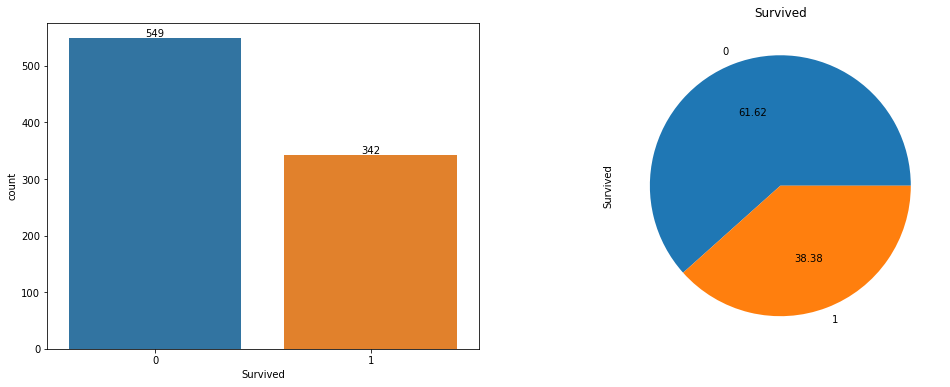

In [11]:
Analysis.UnivariateAnalysis_cat(col_name='Survived')

## Pclass

There are 0 null values in the 'Pclass' feature.
----------------------------------
Value counts of feature 'Pclass':
3    491
1    216
2    184
Name: Pclass, dtype: int64


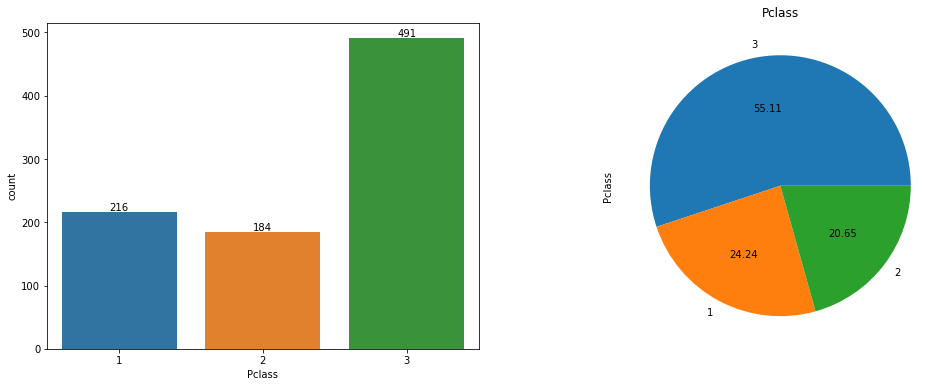

In [12]:
Analysis.UnivariateAnalysis_cat(col_name='Pclass')

## Sex

There are 0 null values in the 'Sex' feature.
----------------------------------
Value counts of feature 'Sex':
male      577
female    314
Name: Sex, dtype: int64


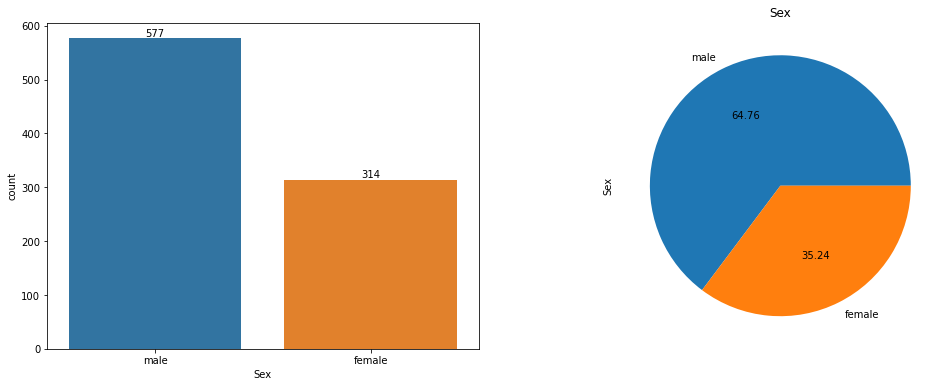

In [13]:
Analysis.UnivariateAnalysis_cat(col_name='Sex')

## SibSp

There are 0 null values in the 'SibSp' feature.
----------------------------------
Value counts of feature 'SibSp':
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


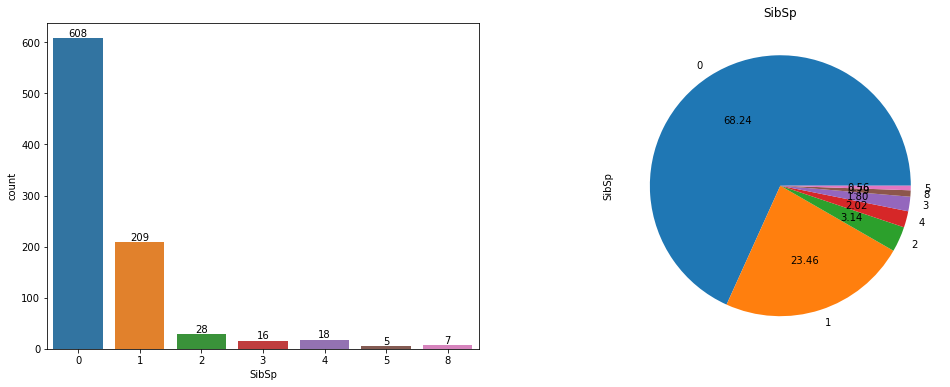

In [14]:
Analysis.UnivariateAnalysis_cat(col_name='SibSp')

## Parch

There are 0 null values in the 'Parch' feature.
----------------------------------
Value counts of feature 'Parch':
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


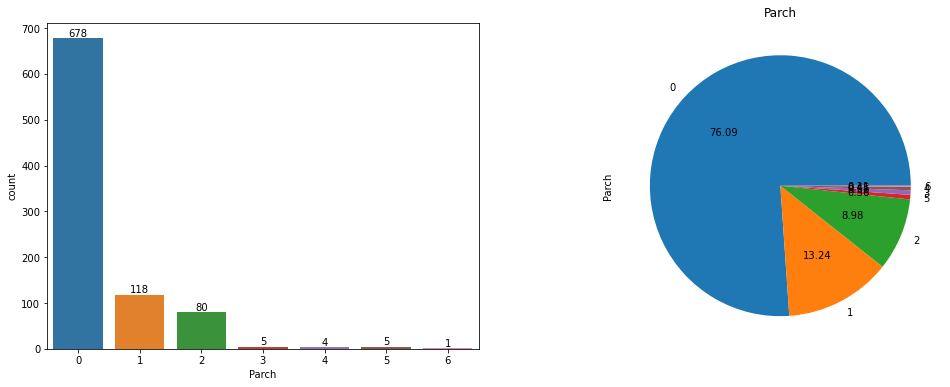

In [15]:
Analysis.UnivariateAnalysis_cat(col_name='Parch')

## Embarked

There are 2 null values in the 'Embarked' feature.
----------------------------------
Value counts of feature 'Embarked':
S    644
C    168
Q     77
Name: Embarked, dtype: int64


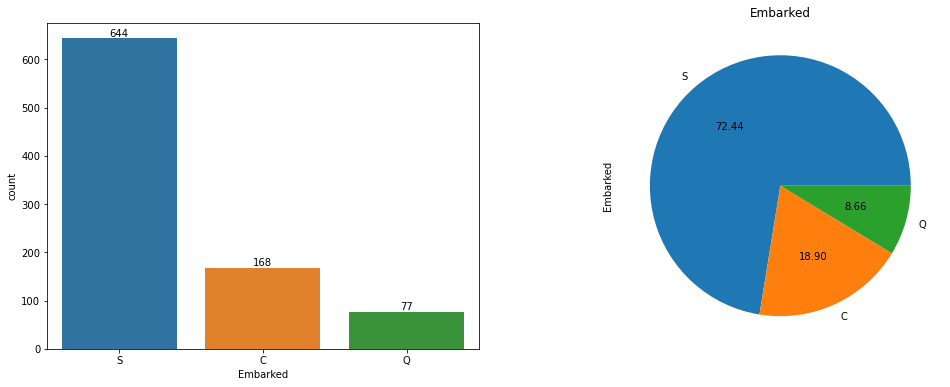

In [16]:
Analysis.UnivariateAnalysis_cat(col_name='Embarked')

There are 177 null values in the 'Age' feature.


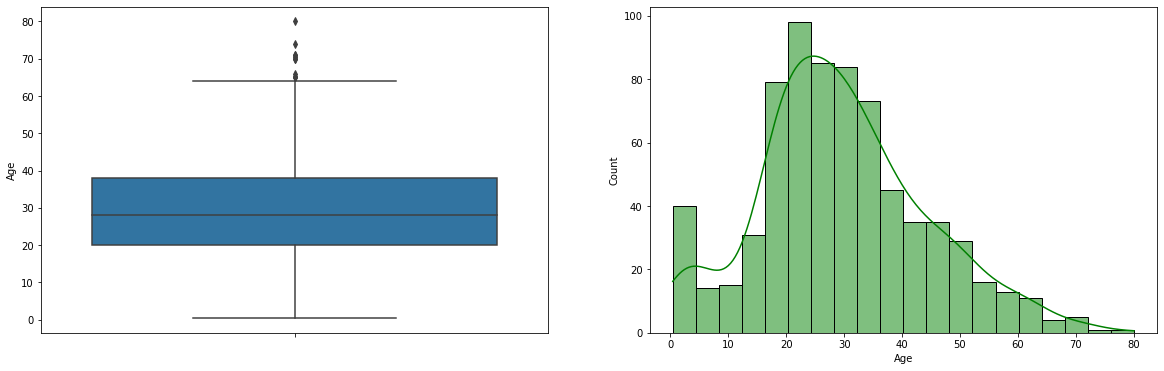

In [17]:
Analysis.UnivariateAnalysis_num(col_name='Age')

# 5.Handling Missing Values

**Age**
• filling missing data with mean Or median is not good idea So I am gonna to fill missing values
  in the range of mean + Standard deviation and mean - standard deviation,<br>
• converting dtype.<br>
• I would not remove Outliers because outliers are good

In [18]:
mean = df['Age'].mean()
std = df['Age'].std()
# random numbers
rand_age = np.random.randint(low=mean-std,high=mean+std,size=df['Age'].isnull().sum())

# filling NaN values
age_copy = df['Age'].copy()
age_copy[np.isnan(age_copy)] = rand_age
df['Age'] = age_copy

# converting dtype
df['Age'] = df['Age'].astype('int64')

There are 0 null values in the 'Age' feature.


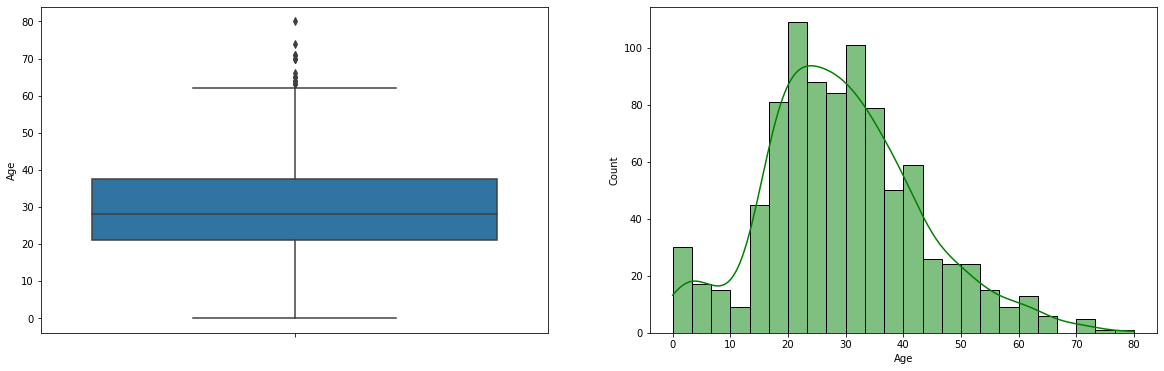

In [19]:
Analysis.UnivariateAnalysis_num(col_name='Age')

## Cabin
Droping Cabin is good Idea because:

In [20]:
df.drop(labels='Cabin',axis=1,inplace=True)

## Ticket
Ticket column does not make sense for me so Droping:

In [21]:
df.drop(labels='Ticket',axis=1,inplace=True)

## Fare
fare feature should in round figure

In [22]:
df['Fare'] = round(df['Fare'])

## Name
Name feature do not hold any significance So droping name

## Embarked
Replacing with mode will be good

There are 2 null values in the 'Embarked' feature.
----------------------------------
Value counts of feature 'Embarked':
S    644
C    168
Q     77
Name: Embarked, dtype: int64


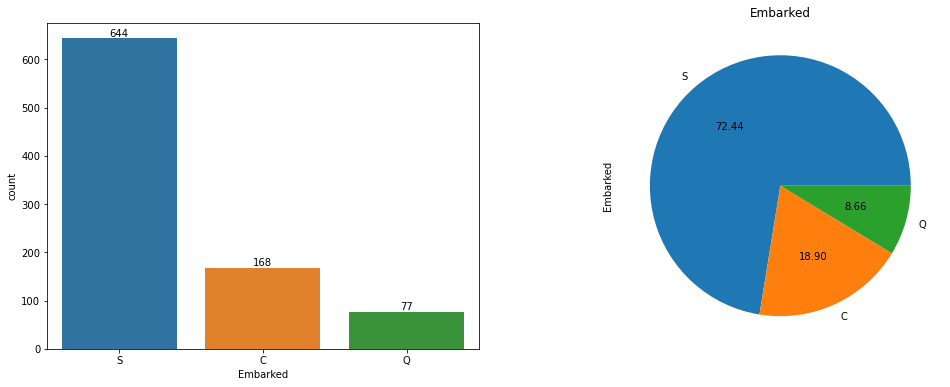

In [23]:
Analysis.UnivariateAnalysis_cat(col_name='Embarked')

In [24]:
df['Embarked'] = df['Embarked'].fillna(value='S')

There are 0 null values in the 'Embarked' feature.
----------------------------------
Value counts of feature 'Embarked':
S    646
C    168
Q     77
Name: Embarked, dtype: int64


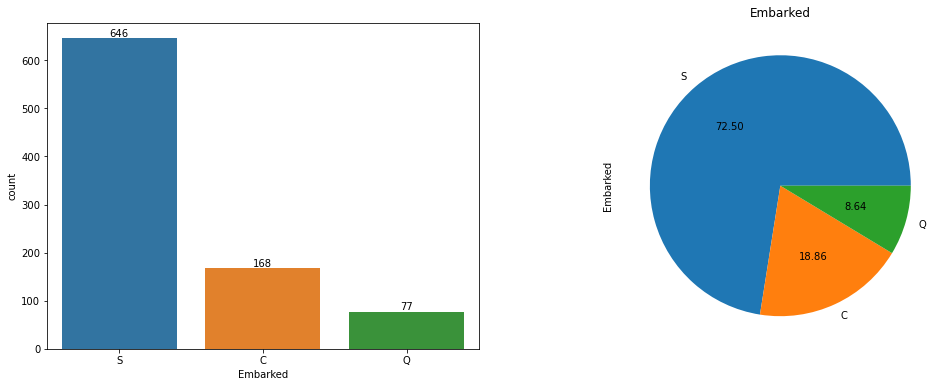

In [25]:
Analysis.UnivariateAnalysis_cat(col_name='Embarked')

In [26]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 6.Concating Columns

In [27]:
df['Family'] = df['Parch'] + df['SibSp']
df.drop(labels=['SibSp','Parch'],axis=1 , inplace=True)

In [28]:
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22,7.0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,71.0,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26,8.0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,53.0,S,1
4,0,3,"Allen, Mr. William Henry",male,35,8.0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,13.0,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19,30.0,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,37,23.0,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26,30.0,C,0


## Bivariate Analysis <br>
Matches for Bivariate Analysis<br>
• fare - survived[yes][sex]<br>
• fare - survived[No][sex]<br>
• fare - age [Survived]<br>
• fare - embarked <br>
============== <br>
• age[male] - survived <br>
• age[femal] - survived <br>
• age - sex <br>
• age - embarked <br>
• age - family <br>

<AxesSubplot:title={'center':'fare - embarked'}, xlabel='Fare', ylabel='Count'>

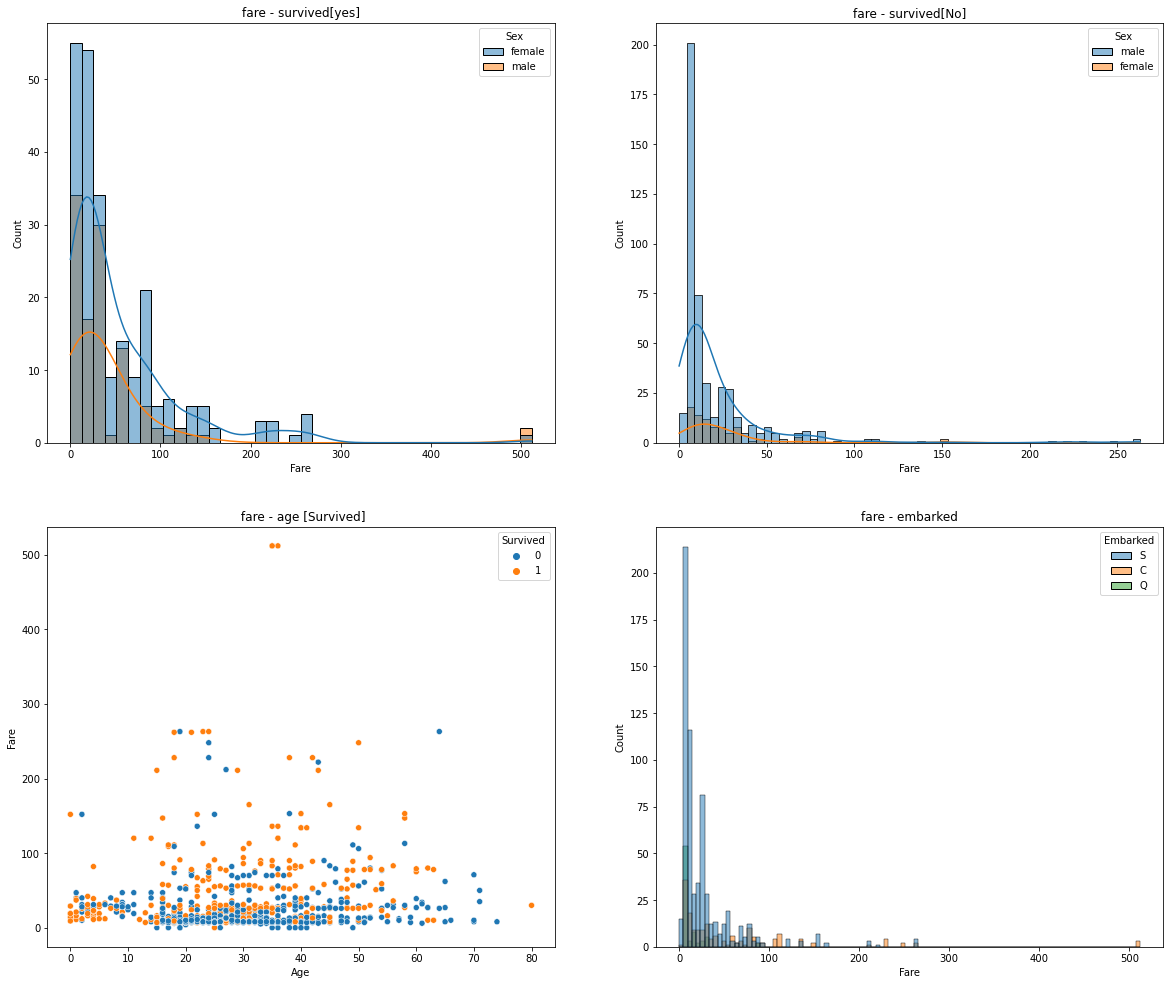

In [29]:
plt.subplots(nrows=2,ncols=2,figsize = (20,17))
plt.subplot(2,2,1)
plt.title('fare - survived[yes]')
sns.histplot(data=df[df['Survived'] == 1],x='Fare',hue='Sex',kde=True)
plt.subplot(2,2,2)
plt.title('fare - survived[No]')
sns.histplot(data=df[df['Survived'] == 0],x='Fare',hue='Sex',kde=True,color='y')
plt.subplot(2,2,3)
plt.title(' fare - age [Survived]')
sns.scatterplot(data=df,y='Fare',x='Age',hue='Survived')
plt.subplot(2,2,4)
plt.title('fare - embarked')
sns.histplot(data=df,x='Fare',hue='Embarked')

In [30]:
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22,7.0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,71.0,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26,8.0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,53.0,S,1
4,0,3,"Allen, Mr. William Henry",male,35,8.0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,13.0,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19,30.0,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,37,23.0,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26,30.0,C,0


In [31]:
df.drop('Name', axis=1, inplace=True)

In [32]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22,7.0,S,1
1,1,1,female,38,71.0,C,1
2,1,3,female,26,8.0,S,0
3,1,1,female,35,53.0,S,1
4,0,3,male,35,8.0,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27,13.0,S,0
887,1,1,female,19,30.0,S,0
888,0,3,female,37,23.0,S,3
889,1,1,male,26,30.0,C,0


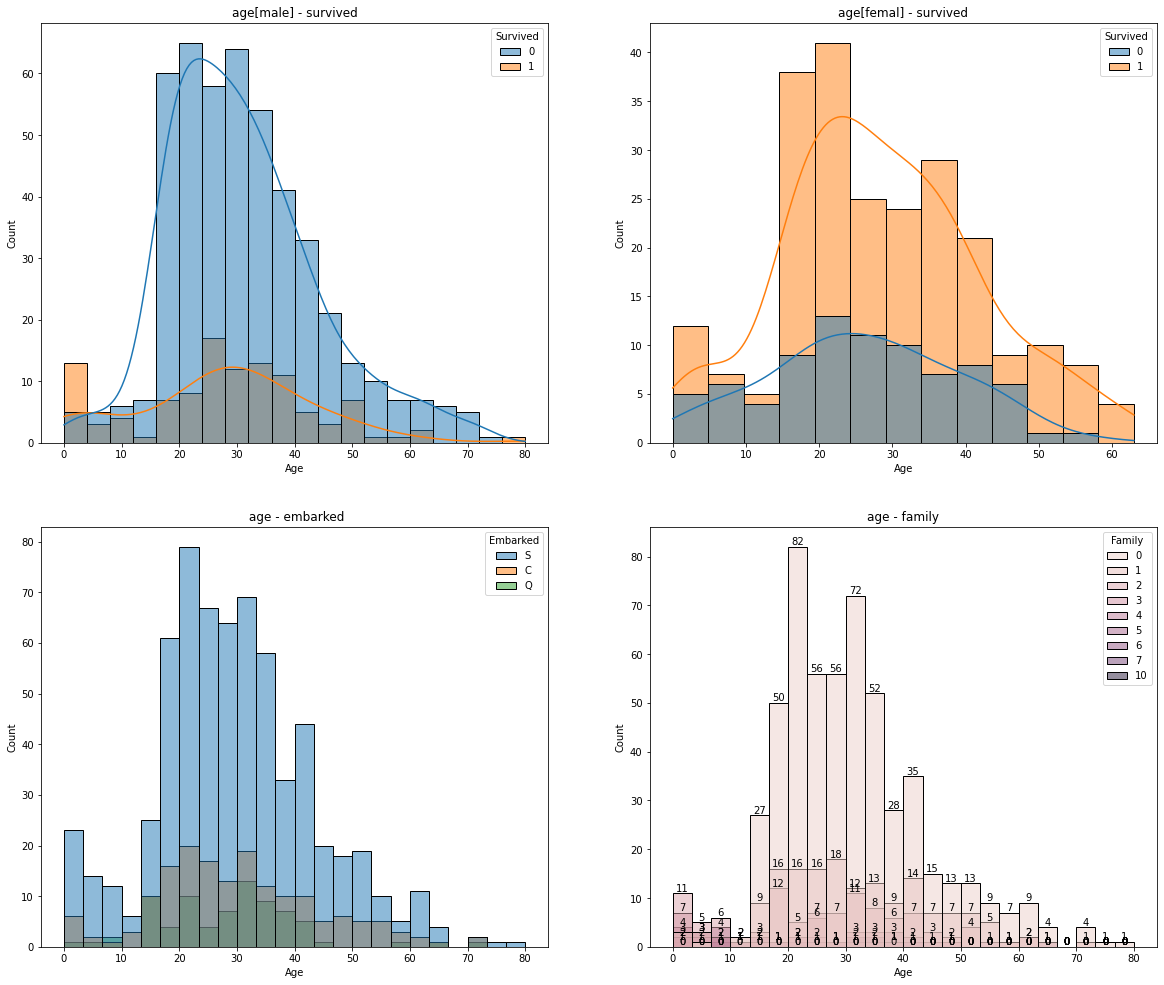

In [33]:
plt.subplots(nrows=2, ncols=2, figsize=(20, 17))
plt.subplot(2, 2, 1)
plt.title('age[male] - survived')
sns.histplot(data=df[df['Sex'] == 'male'], x='Age', hue='Survived', kde=True)
plt.subplot(2, 2, 2)
plt.title('age[femal] - survived')
sns.histplot(data=df[df['Sex'] == 'female'], x='Age', hue='Survived', kde=True, color='y')
plt.subplot(2, 2, 3)
plt.title(' age - embarked')
sns.histplot(data=df, x='Age', hue='Embarked', color='g')
plt.subplot(2, 2, 4)
plt.title('age - family')
ax = sns.histplot(data=df, x='Age', hue='Family')
for i in ax.containers:
    ax.bar_label(i)

# 7. Data Encoding
Embarked
As my visualization how all from ‘S’ they have paid more money to others so
here I will do Lable Encoding / Ordinal Encoding

In [34]:
ordinal_Encoder = OrdinalEncoder(categories=[['Q','C','S']])
df['Embarked'] = ordinal_Encoder.fit_transform(df[['Embarked']])

### Sex
for this I will have to simply do OneHotEncoding

In [35]:
ohe = OneHotEncoder()
age = ohe.fit_transform(df[['Sex']])
age.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [36]:
df_sex = pd.DataFrame(data=age.toarray(),columns=ohe.get_feature_names_out())

# Concating df_age and removing age

In [37]:
df = pd.concat(objs=[df,df_sex],axis=1)
df.drop(labels='Sex',axis=1,inplace=True)

# Scaling Fare feature

In [38]:
df['Fare'].describe()

count    891.000000
mean      32.214366
std       49.693352
min        0.000000
25%        8.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [39]:
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

In [40]:
df['Fare'].describe()

count    8.910000e+02
mean     6.666322e-18
std      1.000562e+00
min     -6.486272e-01
25%     -4.875494e-01
50%     -3.667411e-01
75%     -2.445091e-02
max      9.660348e+00
Name: Fare, dtype: float64

# Training model

In [41]:
df

,Survived,Pclass,Age,Fare,Embarked,Family,Sex_female,Sex_male
0,0,3,22,-0.507684,2.0,1,0.0,1.0
1,1,1,38,0.780938,1.0,1,1.0,0.0
2,1,3,26,-0.487549,2.0,0,1.0,0.0
3,1,1,35,0.418513,2.0,1,1.0,0.0
4,0,3,35,-0.487549,2.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0,2,27,-0.386876,2.0,0,0.0,1.0
887,1,1,19,-0.044586,2.0,0,1.0,0.0
888,0,3,37,-0.185529,2.0,3,1.0,0.0
889,1,1,26,-0.044586,1.0,0,0.0,1.0


In [42]:
## Dependent and Independent features
X = df.iloc[:,1:]
y = df['Survived']

In [43]:
## Train test Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42)

In [44]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((712, 7), (712,), (179, 7), (179,))

## Hyper parameter Tuning with RandomizedSearchCV

In [45]:
param_distribution = {                               # # I will give estimator by my self
    'criterion': ('gini', 'entropy'),
    'max_depth': [60, 100, 150],
    'max_features': ('sqrt', 'log2', None)
}

randCV = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            param_distributions=param_distribution,
                            cv=10,
                            verbose=3,
                            random_state=0)

randCV.fit(X_train, y_train)                             

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.764 total time=   0.1s
[CV 2/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.764 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.775 total time=   0.1s
[CV 4/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.831 total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.761 total time=   0.1s
[CV 6/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.732 total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.789 total time=   0.1s
[CV 8/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.789 total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.803 total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=60, max_features=log2;, score=0.859 total

[CV 5/10] END criterion=entropy, max_depth=150, max_features=None;, score=0.789 total time=   0.1s
[CV 6/10] END criterion=entropy, max_depth=150, max_features=None;, score=0.732 total time=   0.2s
[CV 7/10] END criterion=entropy, max_depth=150, max_features=None;, score=0.803 total time=   0.1s
[CV 8/10] END criterion=entropy, max_depth=150, max_features=None;, score=0.817 total time=   0.2s
[CV 9/10] END criterion=entropy, max_depth=150, max_features=None;, score=0.817 total time=   0.1s
[CV 10/10] END criterion=entropy, max_depth=150, max_features=None;, score=0.831 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=60, max_features=sqrt;, score=0.778 total time=   0.1s
[CV 2/10] END criterion=entropy, max_depth=60, max_features=sqrt;, score=0.792 total time=   0.1s
[CV 3/10] END criterion=entropy, max_depth=60, max_features=sqrt;, score=0.775 total time=   0.1s
[CV 4/10] END criterion=entropy, max_depth=60, max_features=sqrt;, score=0.845 total time=   0.1s
[CV 5/10] END

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [60, 100, 150],
                                        'max_features': ('sqrt', 'log2', None)},
                   random_state=0, verbose=3)

In [46]:
randCV.best_params_

{'max_features': None, 'max_depth': 150, 'criterion': 'entropy'}

In [47]:
rand_Forest_clf = RandomForestClassifier(n_estimators=200, max_features='log2', max_depth=150, criterion='gini')

# Model Training Automation

In [48]:
models = {
'rand_Forest_clf' :RandomForestClassifier(n_estimators=200,max_features='log2',max_depth=150,criterion='gini'),
'logisticRegresson' : LogisticRegression(),
'DecisionTree_clf': DecisionTreeClassifier()
}

In [49]:
def best_model(X_train,y_train,X_test,y_test,models):
    report = {}
    for i in range(len(models)):
        model_train = list(models.values())[i]    # training model
        model_train.fit(X_train,y_train)
        # prediction
        y_pred_test = model_train.predict(X_test)

        # Checking accuracy of model
        model_train_score = accuracy_score(y_true=y_test,y_pred=y_pred_test)
        report[list(models.keys())[i]] = model_train_score
    return report

In [50]:
print(best_model(X_train,y_train,X_test,y_test,models=models))
print(' Random Forest Classifier Accuracy is highest So I will deploy with Decision Tree')

{'rand_Forest_clf': 0.8156424581005587, 'logisticRegresson': 0.8100558659217877, 'DecisionTree_clf': 0.8100558659217877}
 Random Forest Classifier Accuracy is highest So I will deploy with Decision Tree


Note: If warning message is generated by the `LogisticRegression` function in scikit-learn. 
It indicates that the algorithm failed to converge, which means it did not reach the optimal solution within the maximum number of iterations.
The warning message suggests increasing the `max_iter` parameter or scaling the data, or trying different solver options.
If the warning persists, it may be necessary to investigate further to determine if the model is appropriate for the data.
or if there are issues with the data itself.